<a href="https://colab.research.google.com/github/juanpablosalas/SalasJuanPablo_RECV_Entrega3/blob/main/SalasJuanPablo_RECV_Entrega3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Carga de datos**

In [ ]:
archivo = '/content/drive/MyDrive/Colab Notebooks/iris.data'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(archivo, names = ['sepal_length','sepal_width','petal_length','petal_width','class'])

data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###**Perceptrón 1**
Clasifica flores entre Iris setosa y otras acorde a la longitud de su sépalo y al ancho de su pétalo

In [ ]:
#Volviendo un problema no binario, binario
x1 = data['sepal_length']
x1 = x1/x1.max()
x2 = data['petal_width']
x2 = x2/x2.max()
y = data['class'].copy()
y[y=='Iris-virginica'] = 0
y[y=='Iris-versicolor'] = 0
y[y=='Iris-setosa'] = 1

np.unique(y)

other = y == 0
setosa = y == 1

In [ ]:
def f(x):
  return -(b+w1*x)/w2

In [ ]:
def act(z):
  return 1/(1+np.exp(-z))

####Perceptrón

Epoch [1/15], bias: -0.5, w1: -0.4430379746835443, w2: -0.27999999999999997


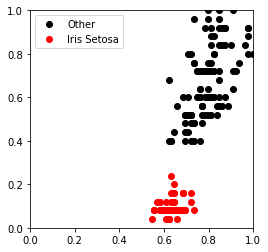

Epoch [2/15], bias: 0.0, w1: -0.25316455696202533, w2: -0.4799999999999999


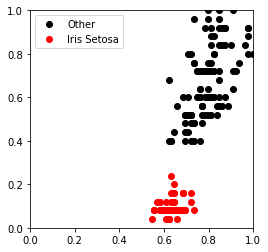

Epoch [3/15], bias: 0.0, w1: -0.3734177215189874, w2: -0.72


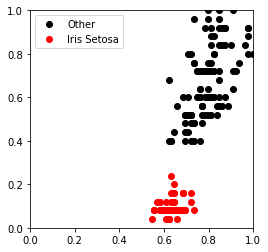

Epoch [4/15], bias: 0.0, w1: -0.49367088607594944, w2: -0.96


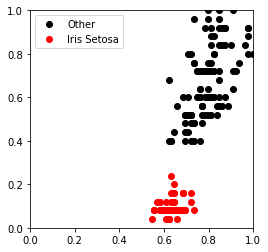

Epoch [5/15], bias: 0.0, w1: -0.4810126582278482, w2: -1.1199999999999999


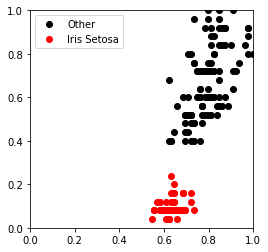

Epoch [6/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


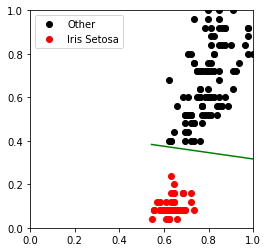

Epoch [7/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


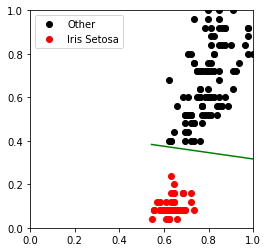

Epoch [8/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


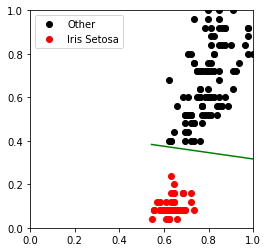

Epoch [9/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


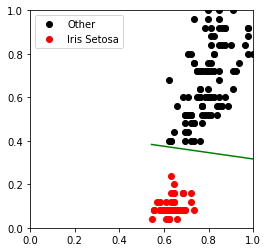

Epoch [10/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


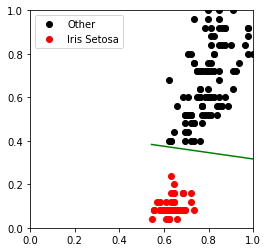

Epoch [11/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


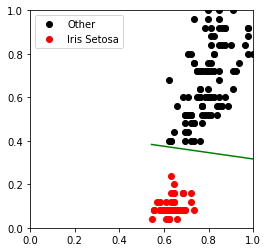

Epoch [12/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


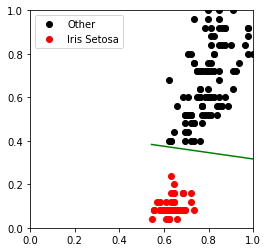

Epoch [13/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


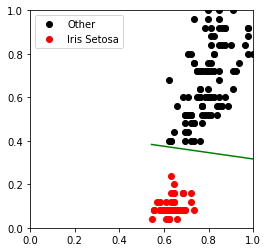

Epoch [14/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


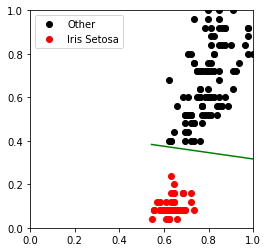

Epoch [15/15], bias: 0.5, w1: -0.158227848101266, w2: -1.0799999999999998


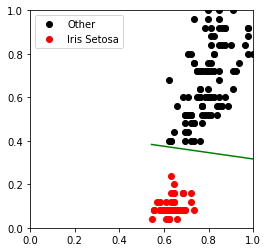

In [ ]:
b = 0
w1 = 0
w2 =0
n_epochs = 15
n = 0.5

x1 = data['sepal_length']/data['sepal_length'].max()
x2 = data['petal_width']/data['petal_width'].max()

for epoch in range(n_epochs):
  for i,j,k in zip(x1,x2,y):
    z = i*w1+j*w2+b
    sig_z = act(z)

    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
    error = k-out
    b = b+n*error
    w1 = w1 + n*error*i
    w2 = w2 + n*error*j
  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w1,w2)) 
  fig = plt.figure(figsize=(4,4))
  plt.plot(x1[other],x2[other],'o',c='black',label='Other')
  plt.plot(x1[setosa],x2[setosa],'o',c='red',label='Iris Setosa')
  plt.plot(np.sort(x1),f(np.sort(x1)),'g-')
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.legend()
  plt.show()

###**Perceptrón 2**
Clasifica flores entre Iris setosa, Iris versicolor e iris virginica acorde a sus características

In [ ]:
X = data.drop(['class'],axis='columns')
Y = data['class']
Y = np.array(Y)
Y[Y=='Iris-virginica'] = 0
Y[Y=='Iris-versicolor'] = 1
Y[Y=='Iris-setosa'] = 2
Y = np.array(Y,dtype='int')

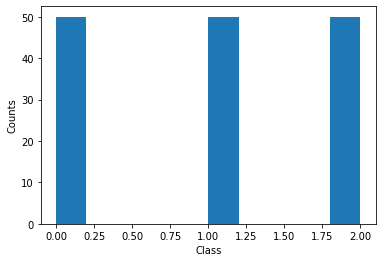

In [ ]:
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Class')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#### Usando dos capas

In [ ]:
model = MLPClassifier(activation='relu',  hidden_layer_sizes=(2,8), solver='adam', learning_rate_init=0.1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

accuracy_score(Y_pred,Y_test)

0.9736842105263158

#### Usando tres capas

In [ ]:
model = MLPClassifier(activation='relu',  hidden_layer_sizes=(3,3), solver='adam', learning_rate_init=0.1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

accuracy_score(Y_pred,Y_test)

0.3157894736842105